In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Conv2D, MaxPool1D, Dropout

In [ ]:
data = pd.read_csv('rawdata.csv')
data

,SAMPLE_ID,snp_0,snp_1,snp_2,snp_3,snp_4,snp_5,snp_6,snp_7,snp_8,snp_9,snp_10,snp_11,snp_12,snp_13,snp_14,snp_15,snp_16,snp_17,snp_18,snp_19,snp_20,snp_21,snp_22,snp_23,snp_24,snp_25,snp_26,snp_27,snp_28,snp_29,snp_30,snp_31,snp_32,snp_33,snp_34,snp_35,snp_36,snp_37,snp_38,...,snp_9962,snp_9963,snp_9964,snp_9965,snp_9966,snp_9967,snp_9968,snp_9969,snp_9970,snp_9971,snp_9972,snp_9973,snp_9974,snp_9975,snp_9976,snp_9977,snp_9978,snp_9979,snp_9980,snp_9981,snp_9982,snp_9983,snp_9984,snp_9985,snp_9986,snp_9987,snp_9988,snp_9989,snp_9990,snp_9991,snp_9992,snp_9993,snp_9994,snp_9995,snp_9996,snp_9997,snp_9998,snp_9999,snp_10000,STATUS
0,HCB181,1,0,0,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,1,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,2,1
1,HCB182,1,0,0,1,1,2,2,1,2,2,2,1,2,1,2,2,2,2,2,0,0,2,2,2,2,2,2,1,1,1,2,0,0,0,0,0,0,2,2,...,1,2,2,1,2,1,2,2,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,1,1,2,2,2,1,2,2,2,2
2,HCB183,1,0,0,1,2,2,2,1,2,2,2,1,2,1,1,2,2,2,2,0,0,2,2,2,2,1,2,1,2,1,2,2,2,0,0,0,0,2,2,...,1,2,2,2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,1,2,2,2,1,2,2
3,HCB184,1,0,0,1,1,2,2,1,2,2,2,1,1,2,2,2,2,2,2,0,0,2,2,2,2,1,1,2,2,2,2,2,2,0,0,0,0,2,2,...,1,1,1,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
4,HCB185,1,0,0,1,1,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,1,2,...,1,1,2,1,2,2,2,2,1,2,2,2,2,2,2,2,2,1,2,2,2,2,2,1,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,JPT265,1,0,0,1,1,1,1,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,1,2,2,1,1,2
85,JPT266,1,0,0,1,2,2,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1,2,1,2,2,2,1,2,2,2,1,2,...,1,1,2,1,2,1,2,1,1,2,2,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,2,2,1,2,2
86,JPT267,1,0,0,1,2,1,2,2,2,2,2,2,2,2,2,2,2,0,0,2,2,0,0,0,0,1,2,2,2,2,2,0,0,2,2,2,2,1,2,...,1,1,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,1,2,1,2,2,2,2,2,2,2,1,2,2,2,2,2,1,1,2,2,1
87,JPT268,1,0,0,1,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,...,1,2,2,1,1,1,1,1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2,1,2,1,2,1,1,1


In [ ]:
data[['SAMPLE_ID']] = LabelEncoder().fit_transform(data[['SAMPLE_ID']])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Pada code diatas dapat dilihat bahwa saya mengubah atau mengencode bagian kolom SAMPLE_ID yang awalnya bertipe string menjadi integer dengan menggunakan label encoder dengan tujuan untuk mempermudah proses training nantinya.**

In [ ]:
features = data.drop('STATUS', axis=1)
label = data['STATUS']
print('Features :\n', features)
print('Labels : \n', label)

Features :
     SAMPLE_ID  snp_0  snp_1  snp_2  ...  snp_9997  snp_9998  snp_9999  snp_10000
0           0      1      0      0  ...         1         2         1          2
1           1      1      0      0  ...         1         2         2          2
2           2      1      0      0  ...         2         2         1          2
3           3      1      0      0  ...         2         2         1          2
4           4      1      0      0  ...         2         2         2          2
..        ...    ...    ...    ...  ...       ...       ...       ...        ...
84         84      1      0      0  ...         2         2         1          1
85         85      1      0      0  ...         2         2         1          2
86         86      1      0      0  ...         1         1         2          2
87         87      1      0      0  ...         1         2         1          1
88         88      1      0      0  ...         1         2         2          2

[89 rows x 1000

**Di sini saya membagi 2 bagian yaitu features yang dimulai dari kolom SAMPLE_ID sampai sebelum kolom STATUS dan label hanya pada kolom STATUS**

In [ ]:
normalize_data = StandardScaler().fit_transform(features)
mean = tf.reduce_mean(normalize_data, axis=0)
data_centered = normalize_data-mean

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=1)
print('X train:', x_train.shape)
print('y train:', y_train.shape)
print('X test:', x_test.shape)
print('y test:', y_test.shape)

X train: (71, 10002)
y train: (71,)
X test: (18, 10002)
y test: (18,)


**Berikut saya membagi dataset menjadi 2 bagian yaitu training dan testing dengan ration 80:20.**

In [ ]:
num_classes = 2

**Lalu mentapkan jumlah class sebanyak 2 yang melambangkan kolom label**

In [ ]:
# Mereshape y_train dan y_test
y_train = y_train.values.reshape([-1, 1])
y_test = y_test.values.reshape([-1, 1])

In [ ]:
encoder = OneHotEncoder(sparse=False)
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
x_train = x_train.values.reshape(-1, 10002, 1)
x_test = x_test.values.reshape(-1, 10002, 1)

In [ ]:
# Membuat model CNN conv1D dari keras.
model = Sequential()
model.add(Conv1D(64, 2, input_shape=(10002, 1), activation='relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

**Lalu saya membuat model yang akan dilatih dengan menggunakan model Conv1D yang diimport melalui library Keras dengan activation function ReLu dan Softmax**

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])

In [ ]:
# Mengcompile model, optimizer yang digunakan adalah Adadelta optimizer dari keras.
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

In [ ]:
# Mengatur jumlah batch_size.
batch_size = 520
# Mengatur jumlah epochs.
epochs = 100
# Fit x_train dan y_train ke model.
model = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test, y_test))

Epoch 1/100
1/1 - 18s - loss: 0.6852 - accuracy: 0.5493 - val_loss: 0.6839 - val_accuracy: 0.4444
Epoch 2/100
1/1 - 1s - loss: 0.7096 - accuracy: 0.4225 - val_loss: 0.6849 - val_accuracy: 0.5000
Epoch 3/100
1/1 - 1s - loss: 0.6780 - accuracy: 0.5775 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 4/100
1/1 - 1s - loss: 0.6977 - accuracy: 0.4789 - val_loss: 0.6839 - val_accuracy: 0.5556
Epoch 5/100
1/1 - 1s - loss: 0.6969 - accuracy: 0.4366 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 6/100
1/1 - 1s - loss: 0.7021 - accuracy: 0.5493 - val_loss: 0.6853 - val_accuracy: 0.5556
Epoch 7/100
1/1 - 1s - loss: 0.6838 - accuracy: 0.5352 - val_loss: 0.6897 - val_accuracy: 0.5000
Epoch 8/100
1/1 - 1s - loss: 0.6861 - accuracy: 0.5211 - val_loss: 0.6859 - val_accuracy: 0.5556
Epoch 9/100
1/1 - 1s - loss: 0.6947 - accuracy: 0.5352 - val_loss: 0.6907 - val_accuracy: 0.5000
Epoch 10/100
1/1 - 1s - loss: 0.6871 - accuracy: 0.4648 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 11/100
1/1 - 1s - loss

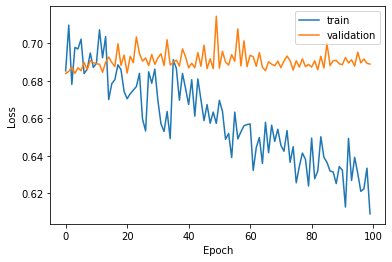

In [ ]:
# Menampilkan hasil evaluasi model dengan grafik, serta menampilkan loss, accuracy, val_loss, dan val_accuracy dari tiap epoch.
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

**Terlihat dari grafik di atas, perbandingan loss dari train model CNN dengan PCA dan validation loss model CNN dengan PCA. Dapat dilihat, loss train model yang dihasilkan naik turun seiring bertambahnya epoch, sedangkan validation loss yang dihasilkan hanya turun sedikit seiring bertambahnya epoch.**